In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

tf.__version__

'2.13.0'

11490434/11490434 [==============================] - 1s 0us/step


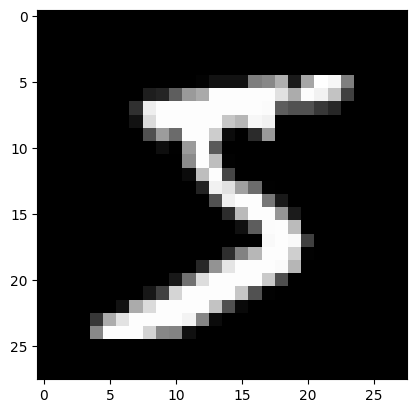

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

plt.imshow(X_train[0], cmap="gray")

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
28 * 28

784

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
 X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
encoder_input = tf.keras.Input(shape=(28,28,1), name="img")
x = tf.keras.layers.Flatten()(encoder_input)
encoder_output = tf.keras.layers.Dense(64, activation="relu")(x)

encoder = tf.keras.Model(encoder_input, encoder_output, name="encoder")

decoder_input = tf.keras.layers.Dense(64, activation='relu')(encoder_output)
x = tf.keras.layers.Dense(784, activation='relu')(decoder_input)
decoder_output = tf.keras.layers.Reshape((28,28,1))(x)

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

autoencoder = tf.keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 105360 (411.56 KB)
Trainable params: 1053

In [9]:
autoencoder.compile(optimizer=opt, loss=tf.keras.losses.mse)

In [10]:
autoencoder.fit(X_train, X_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0216 - val_loss: 0.0147
Epoch 2/3
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0138 - val_loss: 0.0131
Epoch 3/3
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0129 - val_loss: 0.0128


In [11]:
example  = encoder.predict([X_test[0].reshape(-1,28,28,1)])[0]
print(example)

1/1 [==============================] - 0s 79ms/step
[0.         1.8535963  0.5195007  0.5565735  1.4829925  0.94924295
 0.5143247  0.30079362 1.4963446  0.864584   2.140663   0.
 1.5753701  2.5214748  0.         1.2254306  0.2541827  3.2439008
 2.006296   1.2076604  1.4954442  2.269807   1.4321558  1.8692598
 1.5545158  1.2697601  1.7040113  1.0567472  0.57003653 1.4047489
 1.8974068  0.5354129  0.37122148 0.         0.97196794 1.6132038
 1.817106   0.         1.9182298  0.         0.28963625 1.2047998
 0.788961   0.8181007  0.62534255 0.         3.2861075  1.5861799
 0.61789834 1.1949017  1.151148   0.6847426  0.54662246 1.9692004
 2.6053746  1.7686802  1.6902045  0.         1.1030093  1.2345434
 0.73401815 1.1714878  0.5364365  1.109788  ]


In [12]:
example.shape

(64,)

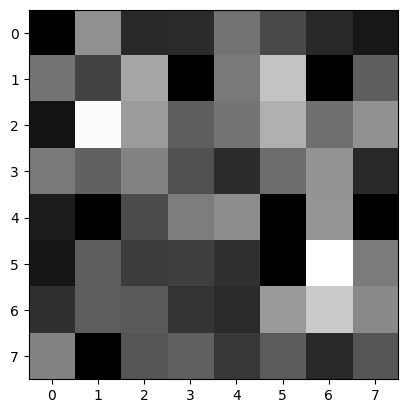

In [13]:
plt.imshow(example.reshape(8,8),cmap="gray")

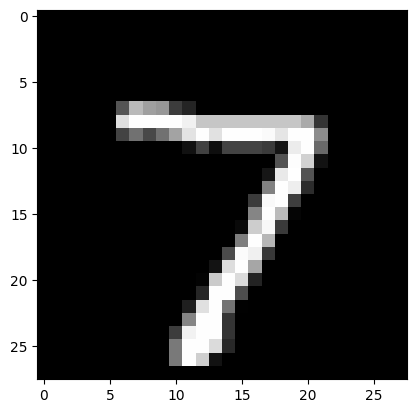

In [14]:
plt.imshow(X_test[0], cmap="gray")

1/1 [==============================] - 0s 77ms/step


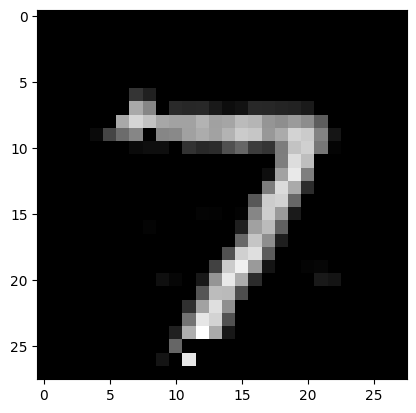

In [15]:
ae_out = autoencoder.predict([X_test[0].reshape(-1,28,28,1)])[0]
plt.imshow(ae_out, cmap="gray")

In [16]:
encoder_input = tf.keras.Input(shape=(28,28,1), name="img")
x = tf.keras.layers.Flatten()(encoder_input)
encoder_output = tf.keras.layers.Dense(9, activation="relu")(x) ## condensing to 16 features

encoder = tf.keras.Model(encoder_input, encoder_output, name="encoder")

decoder_input = tf.keras.layers.Dense(9, activation='relu')(encoder_output)
x = tf.keras.layers.Dense(784, activation='relu')(decoder_input)
decoder_output = tf.keras.layers.Reshape((28,28,1))(x)

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

autoencoder = tf.keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

autoencoder.compile(optimizer=opt, loss=tf.keras.losses.mse)
autoencoder.fit(X_train, X_train, epochs=3, batch_size=32, validation_split=0.1)

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 9)                 7065      
                                                                 
 dense_4 (Dense)             (None, 9)                 90        
                                                                 
 dense_5 (Dense)             (None, 784)               7840      
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 14995 (58.57 KB)
Trainable params: 14995 

1/1 [==============================] - 0s 55ms/step
[4.5032463 5.48547   1.9358171 1.4419527 0.        2.453634  3.4608974
 1.3573651 6.197694 ]
(9,)


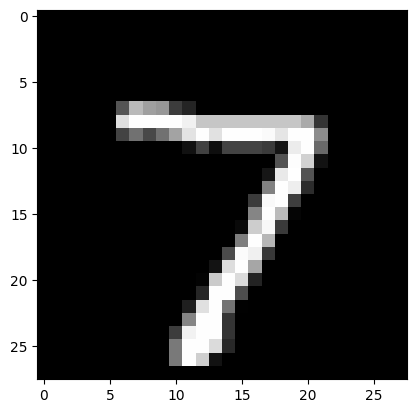

In [17]:
example  = encoder.predict([X_test[0].reshape(-1,28,28,1)])[0]
print(example)
print(example.shape)
plt.imshow(X_test[0], cmap="gray")

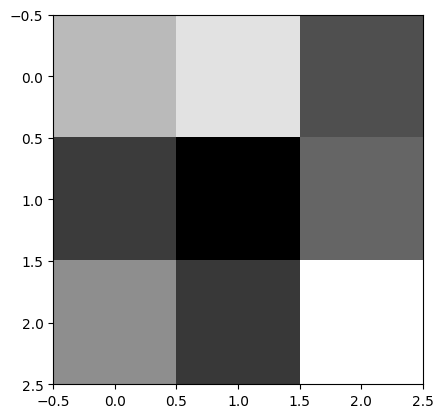

In [18]:
plt.imshow(example.reshape(3,3),cmap="gray")

1/1 [==============================] - 0s 131ms/step


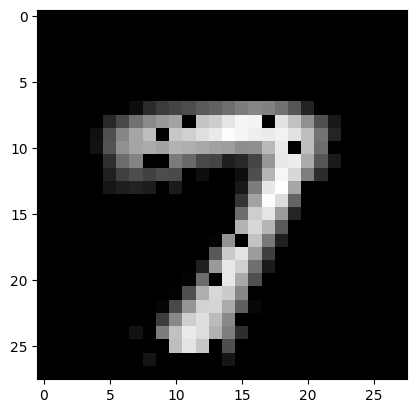

In [19]:
ae_out = autoencoder.predict([X_test[0].reshape(-1,28,28,1)])[0]
plt.imshow(ae_out, cmap="gray")

In [20]:
import random

def add_noise(img, random_chance=5):
  noisy= []
  for row in img:
    new_row = []
    for pix in row:
      if random.choice(range(100)) <= random_chance:
        new_val = random.uniform(0,1)
        new_row.append(new_val)
      else:
        new_row.append(pix)
    noisy.append(new_row)
  return np.array(noisy)

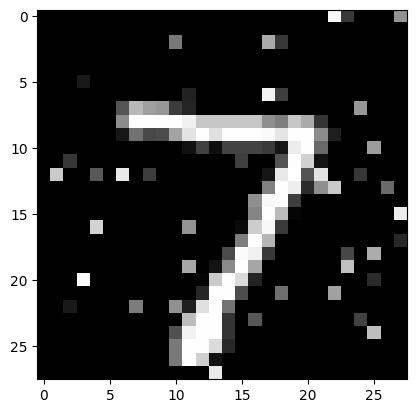

In [21]:
noisy = add_noise(X_test[0])
plt.imshow(noisy, cmap="gray")

1/1 [==============================] - 0s 51ms/step


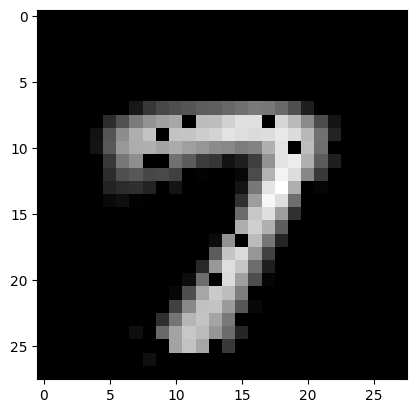

In [22]:
ae_out = autoencoder.predict([noisy.reshape(-1,28,28,1)])[0]
plt.imshow(ae_out, cmap="gray")